# 🚗 Traffic Accident Analysis - Task 04

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("Task-4(skillcraft).csv")
df

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,Clear,Highway,Night,2.0,30.0,4.0,0.0,Low,Dry,Car,23.0,15.0,Daylight,0.0
836,Rainy,Rural Road,Evening,2.0,60.0,4.0,0.0,Low,Dry,Motorcycle,52.0,46.0,Daylight,1.0
837,Foggy,Highway,Evening,NaN,30.0,4.0,1.0,High,Dry,Car,NaN,34.0,Artificial Light,NaN
838,Foggy,Highway,Afternoon,2.0,60.0,3.0,0.0,Low,Dry,Car,25.0,19.0,Artificial Light,0.0


In [3]:
df.isnull().sum()

Weather                 42
Road_Type               42
Time_of_Day             42
Traffic_Density         42
Speed_Limit             42
Number_of_Vehicles      42
Driver_Alcohol          42
Accident_Severity       42
Road_Condition          42
Vehicle_Type            42
Driver_Age              42
Driver_Experience       42
Road_Light_Condition    42
Accident                42
dtype: int64

In [4]:
df_clean = df.dropna(subset=['Weather', 'Road_Type', 'Time_of_Day', 'Accident_Severity', 'Road_Condition', 'Road_Light_Condition'])
df_clean

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0
6,Foggy,Highway,Afternoon,0.0,60.0,4.0,0.0,Low,Dry,Truck,27.0,26.0,Daylight,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,Clear,Highway,Night,2.0,30.0,4.0,0.0,Low,Dry,Car,23.0,15.0,Daylight,0.0
836,Rainy,Rural Road,Evening,2.0,60.0,4.0,0.0,Low,Dry,Motorcycle,52.0,46.0,Daylight,1.0
837,Foggy,Highway,Evening,NaN,30.0,4.0,1.0,High,Dry,Car,NaN,34.0,Artificial Light,NaN
838,Foggy,Highway,Afternoon,2.0,60.0,3.0,0.0,Low,Dry,Car,25.0,19.0,Artificial Light,0.0


## ⌚ Accidents by Time Of Day

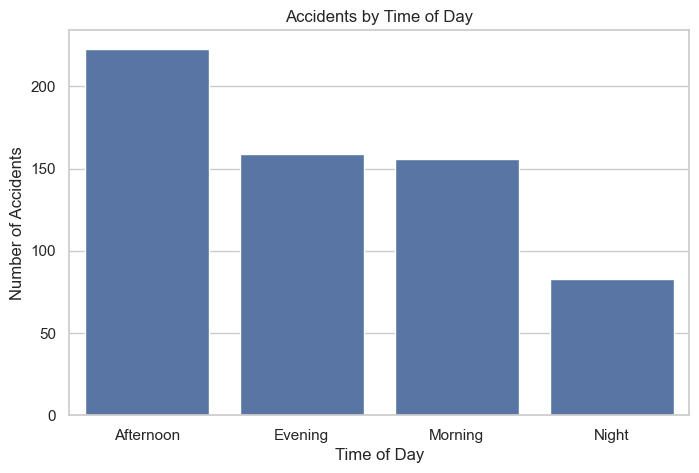

In [6]:
plt.figure(figsize=(8,5))
sns.countplot(x='Time_of_Day', data=df_clean, order=df_clean['Time_of_Day'].value_counts().index)
plt.title("Accidents by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Accidents")
plt.show()

## 🌧️ Road and Weather Conditions

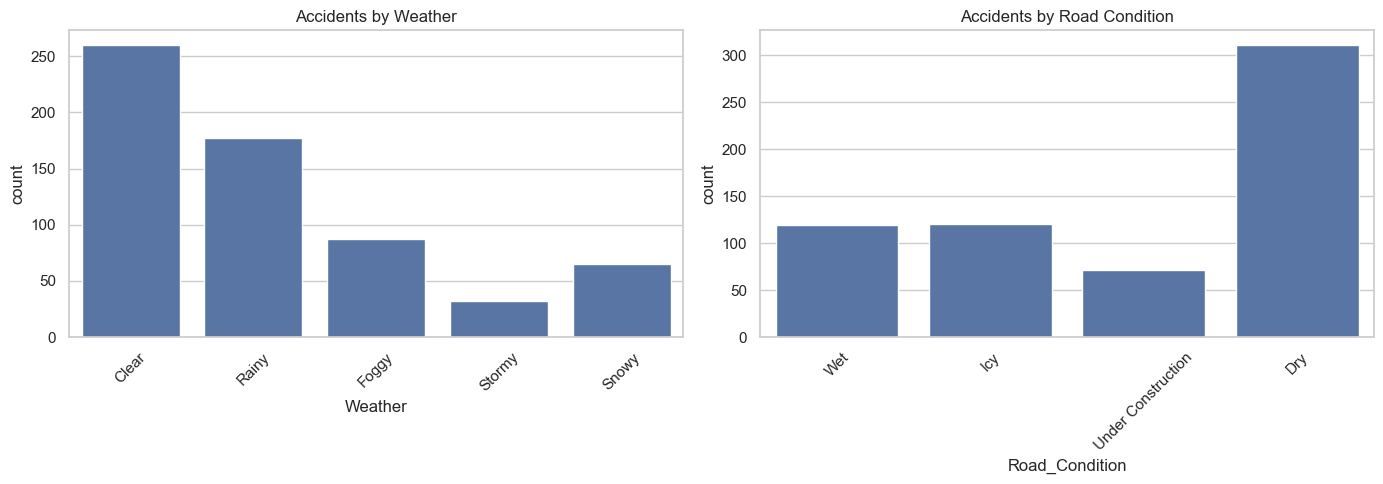

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))
sns.countplot(x='Weather', data=df_clean, ax=axes[0])
axes[0].set_title("Accidents by Weather")

sns.countplot(x='Road_Condition', data=df_clean, ax=axes[1])
axes[1].set_title("Accidents by Road Condition")

for ax in axes:
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

## 🔥 Accident Severity Distribution

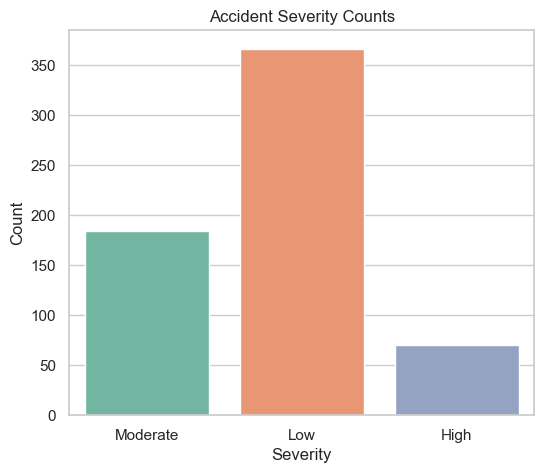

In [8]:
plt.figure(figsize=(6,5))
sns.countplot(x='Accident_Severity', data=df_clean, palette='Set2')
plt.title("Accident Severity Counts")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.show()

## 💡 Road Light Conditions

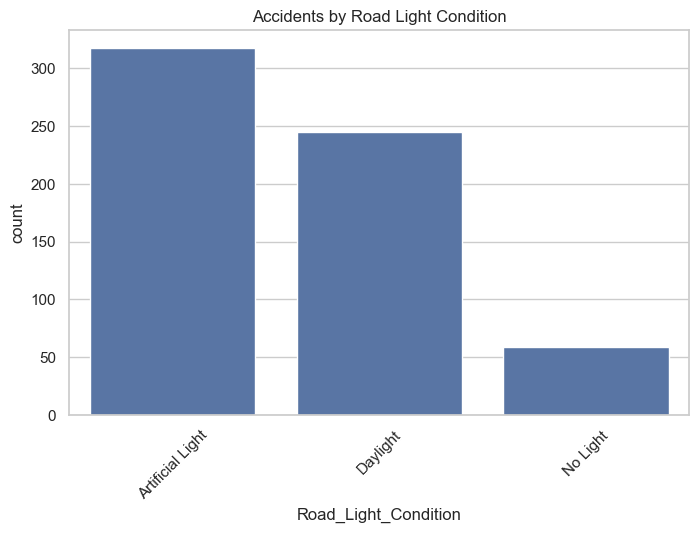

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(x='Road_Light_Condition', data=df_clean)
plt.title("Accidents by Road Light Condition")
plt.xticks(rotation=45)
plt.show()

## 📊 Correlation Between Numeric Factors

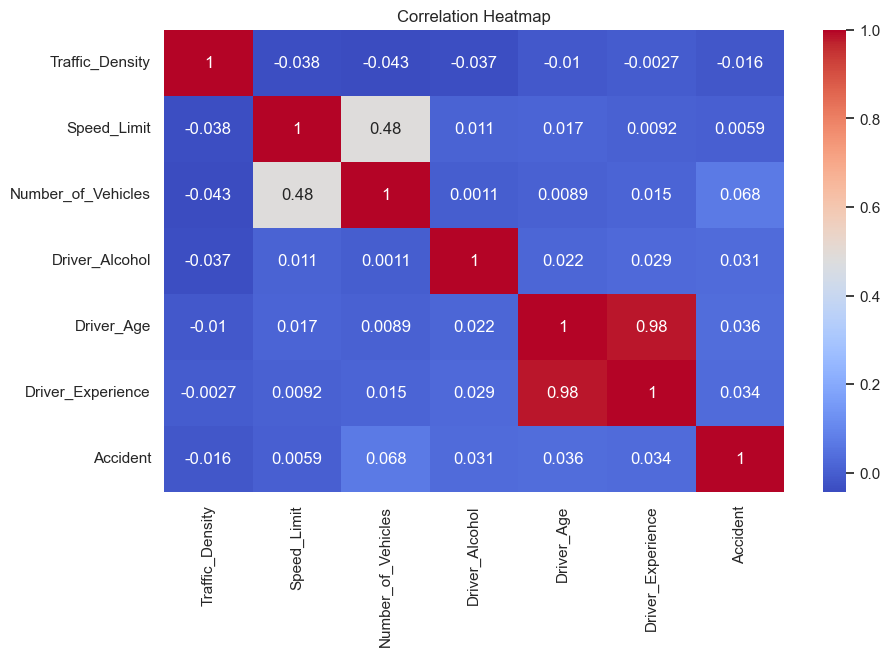

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df_clean.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

df_model = df.dropna(subset=[
    'Weather', 'Road_Type', 'Time_of_Day', 'Accident_Severity',
    'Road_Condition', 'Road_Light_Condition',
    'Traffic_Density', 'Speed_Limit', 'Number_of_Vehicles', 'Driver_Alcohol'
])

le_target = LabelEncoder()
df_model['Severity_Code'] = le_target.fit_transform(df_model['Accident_Severity'])

categorical_cols = ['Weather', 'Road_Type', 'Time_of_Day', 'Road_Condition', 'Road_Light_Condition']
df_encoded = pd.get_dummies(df_model[categorical_cols], drop_first=True)

numerical_cols = ['Traffic_Density', 'Speed_Limit', 'Number_of_Vehicles', 'Driver_Alcohol']
df_numeric = df_model[numerical_cols]

X = pd.concat([df_encoded, df_numeric], axis=1)
y = df_model['Severity_Code']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le_target.classes_)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


Confusion Matrix:
 [[ 0  9  0]
 [ 0 61  0]
 [ 0 31  0]]

Classification Report:
               precision    recall  f1-score   support

        High       0.00      0.00      0.00         9
         Low       0.60      1.00      0.75        61
    Moderate       0.00      0.00      0.00        31

    accuracy                           0.60       101
   macro avg       0.20      0.33      0.25       101
weighted avg       0.36      0.60      0.45       101



## ✅ Conclusion & Observations
Based on the above analysis:
- Certain times of day show higher accident rates.
- Weather and road conditions (e.g., Wet, Icy) are linked with severity.
- Most accidents occur under artificial light or daylight.
- Correlation heatmap can help identify numeric contributors like vehicle count or alcohol use.

You can extend this by using `folium` or `plotly` if you have geo-coordinates for mapping hotspots.